In [1]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import imageio

d:\ProgramData\Python\lib\importlib\__init__.py:127: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


## BÀI 1

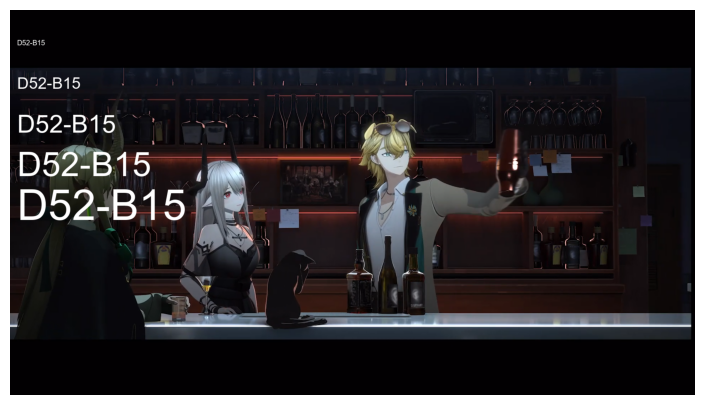

(<matplotlib.image.AxesImage at 0x251a6769eb0>,
 (-0.5, 1919.5, 1079.5, -0.5),
 None)

In [2]:
im = Image.open("../images/agent1.png")
draw = ImageDraw.Draw(im)
fontsize = np.linspace(20, 120, 5)
for size in fontsize:
    font = ImageFont.truetype("arial.ttf", int(size))
    draw.text((20, size * 4), "D52-B15", font=font)
del draw

plt.figure(figsize=(10,5))
plt.imshow(im), plt.axis(False), plt.show()

## BÀI 2

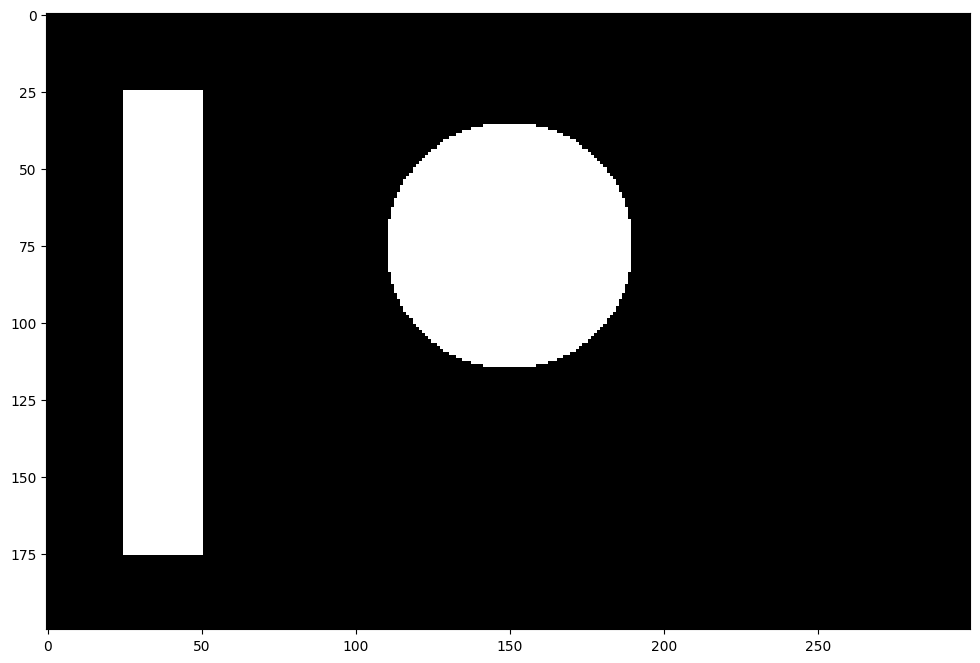

In [3]:
im = np.zeros([200,300,3], dtype=np.uint8)
im.fill(255)
lx, ly, _ = im.shape
X, Y = np.ogrid[0:lx, 0:ly]

topX, topY, botX, botY = 25, 25, 175, 50
mask1 = (X < topX) + (Y < topY) + (X > botX) + (Y > botY)
im[mask1,:] = 0

h, k, r = 75,150,40
mask2 = (X-h)**2 + (Y-k)**2 < r**2
im[mask2,:] = 255

plt.figure(figsize=(12,8))
plt.imshow(im), plt.axis(True)
plt.show()

## BÀI 3

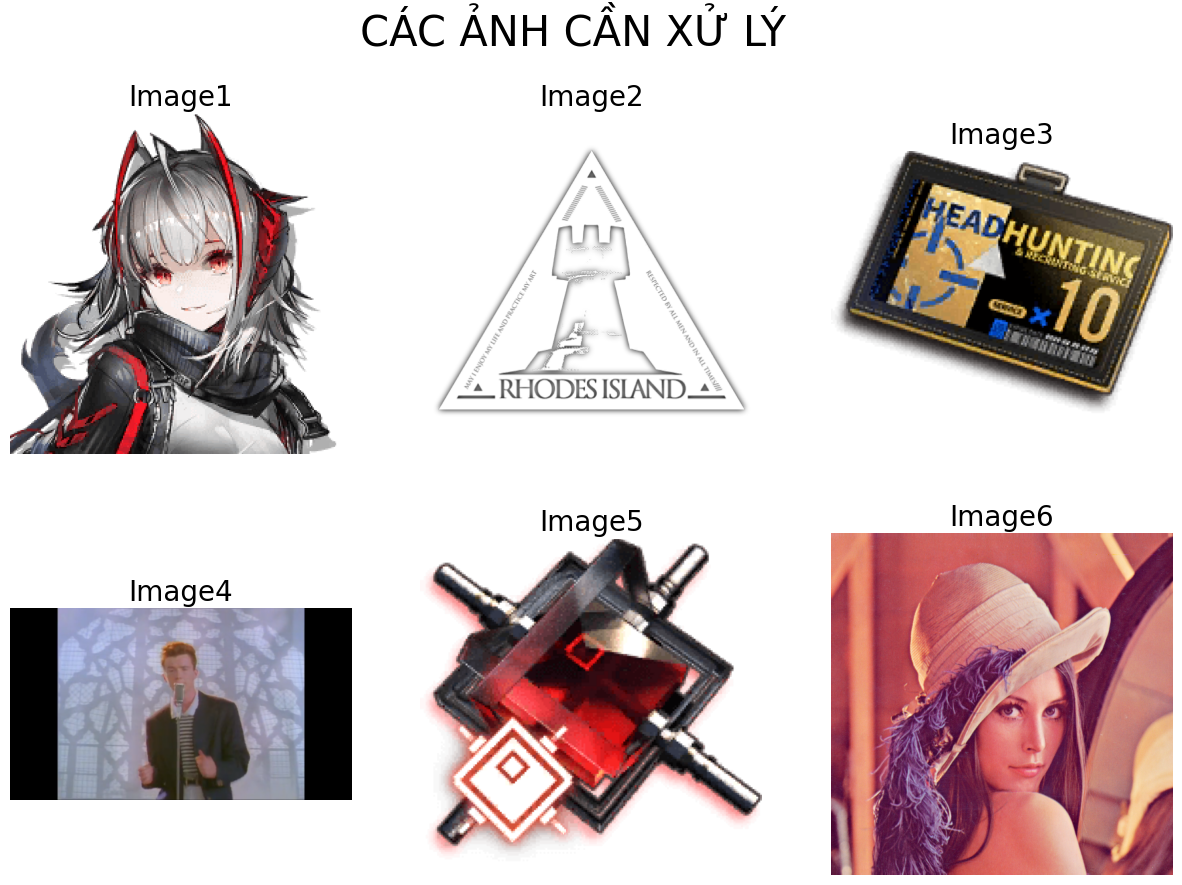

In [4]:
imageFiles = ["w.png", "Rhodes_Island.png", "Headhunt10.png", "rick1.png", "Orundum.png", "Lena.png"]

plt.figure(figsize=(15,10)), plt.suptitle("CÁC ẢNH CẦN XỬ LÝ", size=30)
i = 1
for filename in imageFiles:
    im = imread("../images/" + filename)
    plt.subplot(2,3,i), plt.imshow(im), plt.axis(False), plt.title("Image"+str(i),size=20)
    i += 1

plt.show()

## BÀI 4

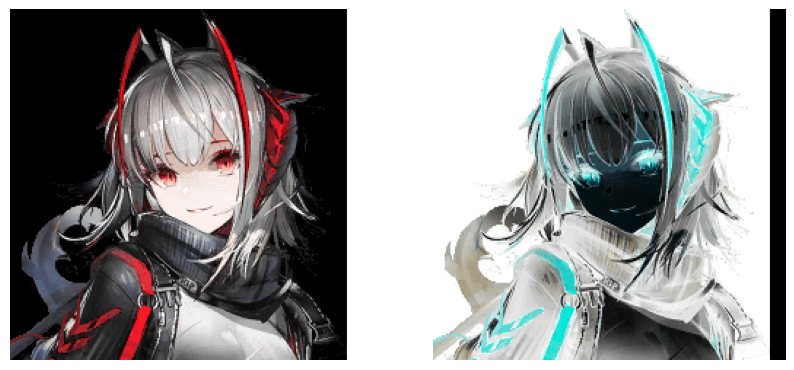

In [5]:
im = Image.open("../images/w.png").convert("RGB")
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(im), plt.axis(False)

im1 = im.point(lambda x: 255-x)

plt.subplot(122), plt.imshow(im1), plt.axis(False)
plt.show()

## BÀI 5

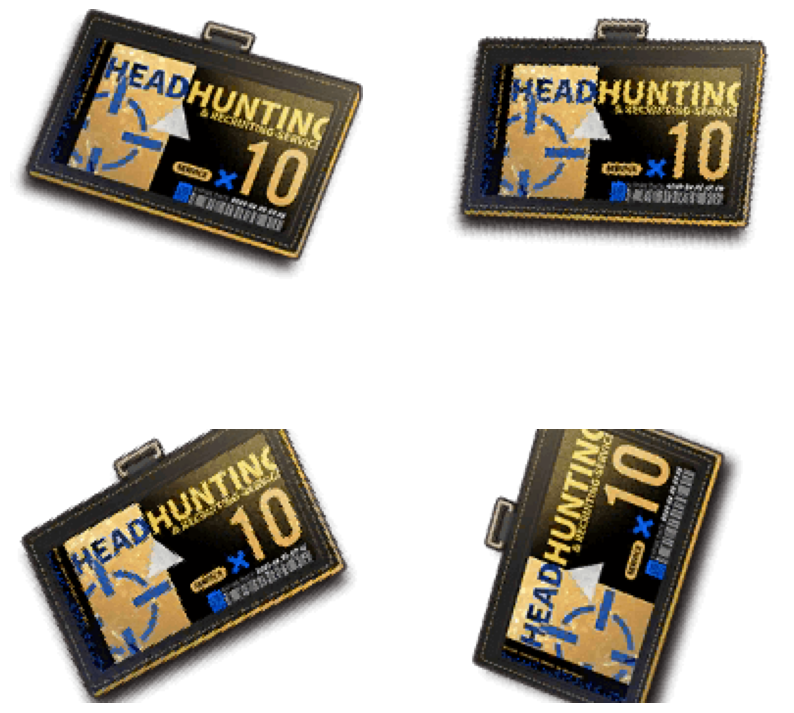

In [6]:
im = Image.open("../images/Headhunt10.png")

rotates = [0,15,45,90]

plt.figure(figsize=(10,10))
i = 1
for rot in rotates:
    plt.subplot(2,2,i), plt.imshow(im.rotate(rot)), plt.axis(False)
    i += 1

plt.show()

## BÀI 6

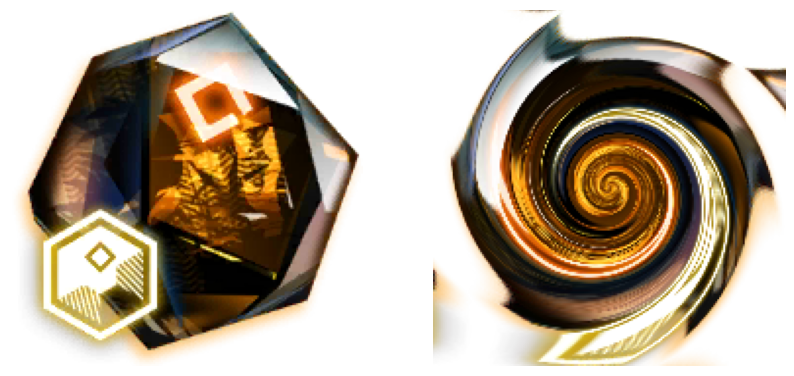

In [7]:
im = imread("../images/Originite_Prime.png")
swirled = swirl(im, rotation=0, strength=15, radius=200)
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(im), plt.axis(False)
plt.subplot(122), plt.imshow(swirled), plt.axis(False)
plt.show()


## BÀI 7

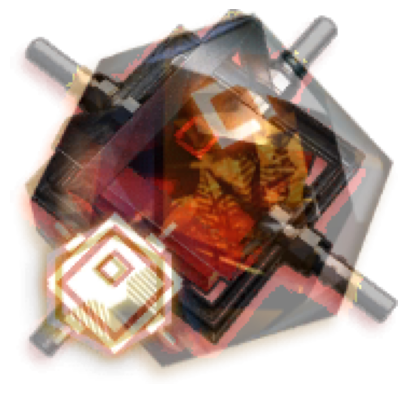

(<matplotlib.image.AxesImage at 0x251a645d070>,
 (-0.5, 179.5, 173.5, -0.5),
 None)

In [10]:
im1 = Image.open("../images/Orundum.png").convert("RGBA")
im2 = Image.open("../images/Originite_Prime.png").convert("RGBA")

im2 = im2.resize((im1.width, im1.height), Image.Resampling.BILINEAR) 

im = Image.blend(im1, im2, alpha=0.5)
plt.figure(figsize=(5,5))
plt.imshow(im), plt.axis(False), plt.show()

## BÀI 8

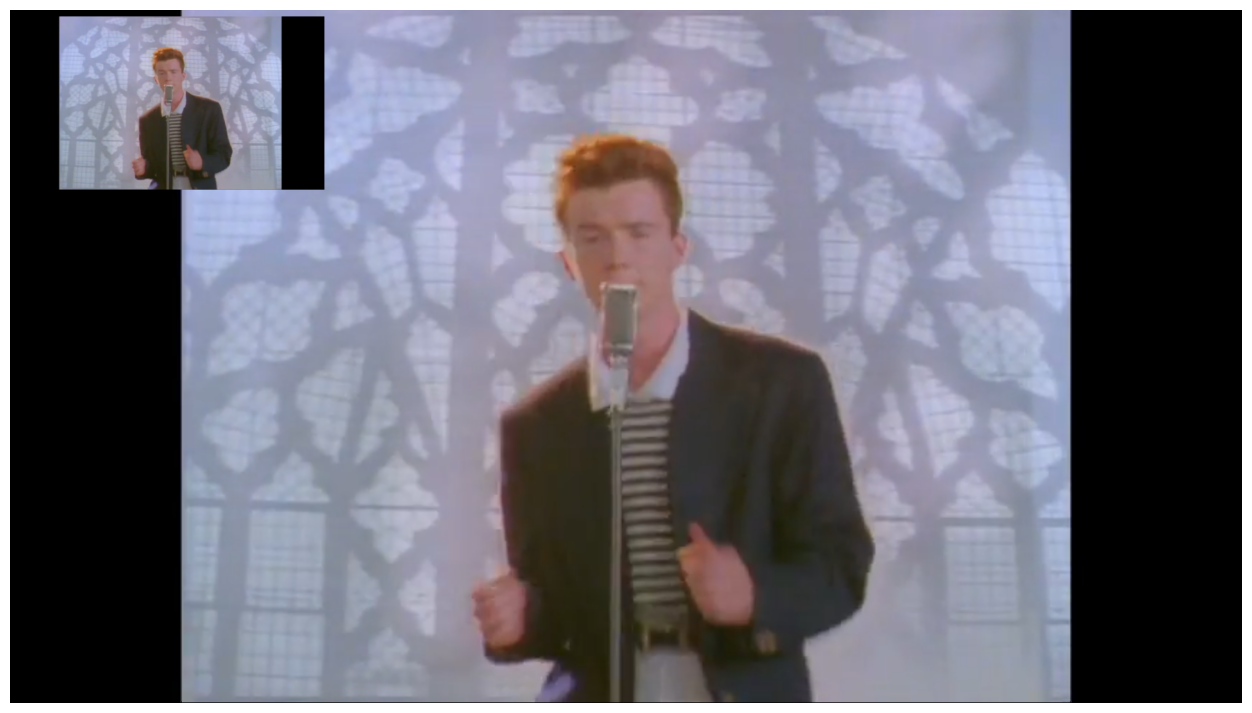

In [9]:
im = Image.open("../images/rick1.png")
im1 = im.copy()
im1.thumbnail((im1.width//4,im1.height//4))
im.paste(im1, (10,10))

plt.figure(figsize=(16,9))
plt.imshow(im), plt.axis(False)
plt.show()

## BÀI 9

## BÀI 10

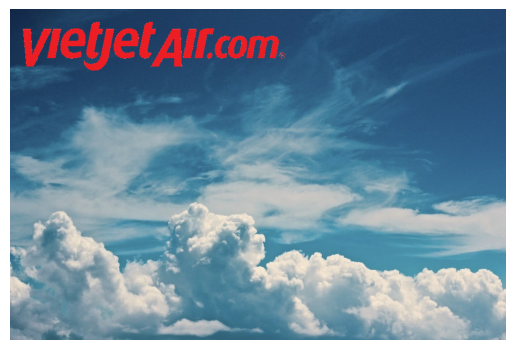

In [31]:
im = Image.open("../images/sky.png").convert("RGBA")
im = np.array(im)
im1 = imread("../images/vietjet.png")

pasteX, pasteY = 25,25

for i in range(im1.shape[0]):
    for j in range(im1.shape[1]):
        if im1[i,j,3] > 100:
            im[pasteX+i,pasteY+j] = im1[i,j]

plt.imshow(im), plt.axis(False)
plt.show()